### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [6]:
 nb_fname = "HA1_PeerReview.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [7]:
NAME1 = "Jonathan Gildevall" 
NAME2 = "Niclas Johansson"
GROUP = "56"

### Check Python version

In [8]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [9]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [10]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [11]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/HA1/HA1.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# HA1 - Cats and dogs

<img src="https://cdn.pixabay.com/photo/2015/05/20/10/03/cat-and-dog-775116_960_720.jpg" alt="Image of cats and dogs" style="width: 500px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colour images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

## Using your cloud GPU
As a way of helping you speed up the training process, each group gets access to a cloud instance with a GPU. Take a look at the [instructions folder](https://github.com/JulianoLagana/deep-machine-learning/blob/master/instructions/) to understand how to connect to an instance and use our tools there. You're free to use this limited resource as you see fit, but if you spend all your credits, you'll need a late day to obtain more (and you can only do this once).

### Strong recommendation:
In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-3) in your own computer (these tasks can be solved on the CPU), and leave most of the available hours for solving tasks 4-5, and refining your best model further (and, if you have the spare hours, experiment a bit!).

### Working efficiently:
Training for several epochs just to have your code break at the last validation step is incredibly frustrating and inefficient. Good practice is to first test long training runs with a much simpler dry-run: a single epoch, a few batches et c.

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance. When experimenting, a single epoch is often enough to tell whether your model setup has improved or not.


Hints:
- If you get errors saying you've exhausted the GPU resources, well, then you've exhausted the GPU resources. However, sometimes that's because `pytorch` didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough cloud credits to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).
- Solving the [computer labs](https://github.com/JulianoLagana/deep-machine-learning/tree/master/computer-labs) is a good way to get prepared for this assignment.

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [12]:
# YOUR CODE HERE
import numpy as np # linear algebra
import pandas as pd # data processing,CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
#import cv2
import matplotlib.pyplot as plt
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import transforms
import copy
import tqdm
from PIL import Image
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder

device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
%matplotlib inline

---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats/data) and download the data from there. You should download both the test and train folders together in one zip file (there is a `Download all` button at the bottom of the page). Unfortunately, you need to create a Kaggle account for this.

**Only necessary for tasks 4-6**: Downloading the data to your local computer is quite straight-forward. Sooner or later you will have to upload the data to the cloud instance and that is a bit more tricky. There are a few ways to do it:

 - Jupyter Notebook upload function. When starting the notebook server with the command `jupyter notebook` you are directed to a main page. In the top right corner there is an upload button.
 - Using [`scp`](https://linuxize.com/post/how-to-use-scp-command-to-securely-transfer-files/) to copy files via an ssh connection.
 - Using the [Kaggle CLI](https://github.com/Kaggle/kaggle-api). We have added it to the conda environment.

For this assignment we will again need data loaders. Like before we need to create a `Dataset` to give as input to a `DataLoader`. 
Fortunately, this type of image data is quite common so we get some help from `pytorch`. We can use [`ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) to create a `Dataset` for our images. As long as our folder structure for the data conforms to the folder structure expected by `ImageFolder`, we can use it right out of the box and the `DataLoader` class will happily accept it as input.

To use `ImageFolder` you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      cats        dogs       cats        dogs       cats        dogs       cats        dogs


The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`.
This is just a convenient way of having a smaller dataset to play with for faster prototyping.

We provide you a notebook that shows how to achieve this folder structure (`create_project_notebook_structure.ipynb`), starting from the original `dogs-vs-cats.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

For the smaller dataset, we advise you to use 70% of the data as training data (and thereby the remaining 30% for validation data). However, for the larger dataset, you should decide how to split between training and validation.

**What percentage of the larger dataset did you decide to use for training?**

**Your answer:** (fill in here)
We decided to use 90%

**Optional (1 POE):** Did you decide to keep the same ratio split between train and validation sets for the larger dataset? Motivate your decision!


**Your answer:** (fill in here)
No, since there's a lot more data and the validation set just needs to provide a decent representation of the entire dataset. We think you could get away with less validation data, but in order to be sure we selected 10%

Fill in the dataset paths (to be used later by your data loaders):

In [13]:
# TODO: Change the directories accordingly
train_path = "/train"
val_path = "/val"
small_train_path = "/small_train"
small_val_path = "/small_val"
# YOUR CODE HERE

---
### 1.1 Preprocessing
**(1 POE)** 

Once you have the expected folder structure, create two data loaders for automatically generating batches from the images in your smaller subset of data. It is here we choose how to preprocess the input data. There are multiple reasons for why we preprocess data:

- Some transformations might be needed to actually make the data work with our network (reshaping, permuting dimensions et c.).
- Make the training more efficient by making the input dimensions smaller, e.g. resizing, cropping.
- Artificially expanding the training data through [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/)
- We have some clever idea of how to change the data to make the training process better.

We do not expect you to do data augmentation, but feel free to preprocess the data as you see fit.
Construct an `ImageFolder` dataset like this:

```python
ImageFolder(<path_to_data_folder>, transform=Compose(<list_of_transforms>))
# example:
ImageFolder(Path.cwd() / "small_train", transform=Compose([ToTensor]))
```

Hints:
- Take a look at [`ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) and [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) from the pytorch docs.
- To preprocess the data you can use the built-in pytorch [`Transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html)
- The `ImageFolder` dataset provides the data as a python image type. For easy conversion to a `torch.Tensor`, use the [`ToTensor`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) transformation.
- The specified `batch_size` should be chosen so that you train fast but don't run out of memory. You need to figure this out empirically; start small and increase the batch size until you run out of memory.
- The `DataLoader` constructor takes an optional argument `num_workers`, which defaults to `0` if not provided. Setting a higher number creates multiple threads which load batches concurrently. This can speed up training considerably.  
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. Resizing the images can be done using the previously mentioned built-in pytorch Transforms.
- Resizing the images to a smaller size while loading them can be beneficial. The VGG network that is used later in this assignment requires that images are at least 224x224, but before that use small images to speed up training. The CNN's do surprisingly well on 64x64 or even 32x32 images. Shorter training cycles give your more time to experiment!

We encourage you to explore the data and choose transformations that you believe to be useful. For exploration we provide you with some helper functions to visually compare transformations side by side:

In [14]:
def compare_transforms(transformations, index):
    """Visually compare transformations side by side.
    Takes a list of ImageFolder datasets with different compositions of transformations.
    It then display the `index`th image of the dataset for each transformed dataset in the list.
    
    Example usage:
        compare_transforms([dataset_with_transform_1, dataset_with_transform_2], 0)
    
    Args:
        transformations (list(ImageFolder)): list of ImageFolder instances with different transformations
        index (int): Index of the sample in the ImageFolder you wish to compare.
    """
    
    # Here we combine two neat functions from basic python to validate the input to the function:
    # - `all` takes an iterable (something we can loop over, like a list) of booleans
    #    and returns True if every element is True, otherwise it returns False.
    # - `isinstance` checks whether a variable is an instance of a particular type (class)
    if not all(isinstance(transf, ImageFolder) for transf in transformations):
        raise TypeError("All elements in the `transformations` list need to be of type ImageFolder")
        
    num_transformations = len(transformations)
    fig, axes = plt.subplots(1, num_transformations)
    
    # This is just a hack to make sure that `axes` is a list of the same length as `transformations`.
    # If we only have one element in the list, `plt.subplots` will not create a list of a single axis
    # but rather just an axis without a list.
    if num_transformations == 1:
        axes = [axes]
        
    for counter, (axis, transf) in enumerate(zip(axes, transformations)):
        axis.set_title("transf: {}".format(counter))
        image_tensor = transf[index][0]
        display_image(axis, image_tensor)

    plt.show()

def display_image(axis, image_tensor):
    """Display a tensor as image
    
    Example usage:
        _, axis = plt.subplots()
        some_random_index = 453
        image_tensor, _ = train_dataset[some_random_index]
        display_image(axis, image_tensor)
    
    Args:
        axis (pyplot axis)
        image_tensor (torch.Tensor): tensor with shape (num_channels=3, width, heigth)
    """
    
    # See hint above
    if not isinstance(image_tensor, torch.Tensor):
        raise TypeError("The `display_image` function expects a `torch.Tensor` " +
                        "use the `ToTensor` transformation to convert the images to tensors.")
        
    # The imshow commands expects a `numpy array` with shape (3, width, height)
    # We rearrange the dimensions with `permute` and then convert it to `numpy`
    image_data = image_tensor.permute(1, 2, 0).numpy()
    height, width, _ = image_data.shape
    axis.imshow(image_data)
    axis.set_xlim(0, width)
    # By convention when working with images, the origin is at the top left corner.
    # Therefore, we switch the order of the y limits.
    axis.set_ylim(height, 0)

In [15]:
# YOUR CODE HERE
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

small_train_if = ImageFolder(Path.cwd() / "small_train", transform=data_transform)
trainloader = DataLoader(small_train_if, batch_size = 32, shuffle=True, num_workers=8)
small_val_if = ImageFolder(Path.cwd() / "small_val", transform=data_transform)
valloader = DataLoader(small_val_if, batch_size =1, shuffle=True, num_workers=8)

**(2 POE)** How did you select transformations, if any? Briefly explain your reasoning:

**Your answer:** (fill in here)
We chosed the horizontal flipp as it is posible that the dogs and cats can be both in the left and rigth part of the immage which gives us free data augmentation.
Then we did the needed resize needed to fit the network

We did look into color shifts and similar but they don't make sense since the color is an important feture in the image- Since the performance achieved was decent we didn't add any other transformations.

---
## 2. Training

**(1 POE)**

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).
Naturally, you must also select a loss function and an optimizer.

Hints:

- Training on a CPU is slow and in the beginning you just want to verify that your architecture actually produces a predicition with the correct shape. Make everything you can to speed up the prototyping phase, e.g. train only for a single epoch and make the images ridiculously small.
- Going from the last CNN layer to the final fully connected layer is not trivial. The convolutions produces "3D" output which we can think of as an image with many channels, while the fully connected layer expects a row vector as input. Calculate how many output features the convolutions produce and use `.reshape` to make your tensor fit the fully connected layer. (It is also common to see the `.view` method to do the same thing. They basically do the same thing but have some differences in internal memory management.) *Hint within the hint:* remember that the fully connected layers expects a *batch* of 1D tensors. 


In [16]:
# YOUR CODE HERE
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16*54*54, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*54*54)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x



Train your model using the two data loaders you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Hints:
- Note that you will need to plot your training and validation losses and accuracies, so make sure that you saved them during training. 

In [17]:
# Any pytorch object (e.g. model, inputs, output, etc.) can 
# be transferred to the current device by running
#       name_of_object.to(device)
# Example:
#       model.to(device)
#
# The following line automatically figures out what device (cpu or gpu)
# you are using and stores the result in `device`.
# Later we can use the `.to(device)` method to move our data or model to the correct device.
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")

net = Net()
criterion = torch.nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
print(device)
net = net.to(device)

# YOUR CODE HERE
train_loss = []
train_acc = []

val_loss = []
val_acc = []

running_loss = 0.0
for epoch in range(10):
    epoch_loss = []
    epoch_acc = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward + optimize
        loss.backward()
        optimizer.step()
        
        # save statistics
        epoch_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total = labels.size(0)
        correct = (truth.eq(predicted.long())).sum()
        epoch_acc.append(100 * correct / total)

        # print statistics
        running_loss += loss.item()
        # print every 2000 mini-batches
        
    print('[%d, %5d] loss: %.3f Acc:%.3f' %
          (epoch + 1, i + 1, running_loss / len(epoch_loss),np.array(epoch_acc).sum()/len(epoch_acc)))

    
    
    train_loss.append(running_loss/len(epoch_loss))
    train_acc.append(np.array(epoch_acc).sum()/len(epoch_acc))
    running_loss = 0
    total = 0
    correct = 0
    count = 0
    for i, data in enumerate(valloader, 0):
        inputs, labels = data 
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        count = count +1
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        running_loss = running_loss + loss.item()

        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total += labels.size(0)
        correct += (truth.eq(predicted.long())).sum()
        
        torch.cuda.empty_cache()
        
    val_acc.append(100 * correct / total)
    val_loss.append(running_loss / count)
    running_loss = 0
    
        
print('Finished Training')

cpu


/Users/nicoletl/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1,   110] loss: 0.693 Acc:50.982


KeyboardInterrupt: 

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

[0.6934291167692704, 0.6932396227663213, 0.6931511174548756, 0.6929646947167136, 0.6928261242129586, 0.6928426336158405, 0.6924421955238689, 0.6924037044698542, 0.6922659223729913, 0.691791913726113]
[0.6929696304798126, 0.6928993926048279, 0.6928124783039094, 0.6928511002461115, 0.6926597084204356, 0.692522824883461, 0.6922873164017995, 0.6921934862534205, 0.6919024965365728, 0.6919482391277949]


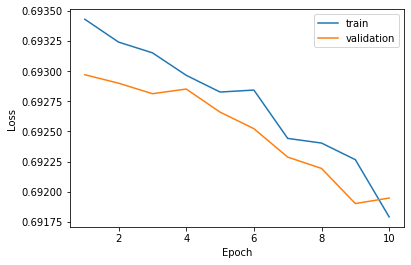

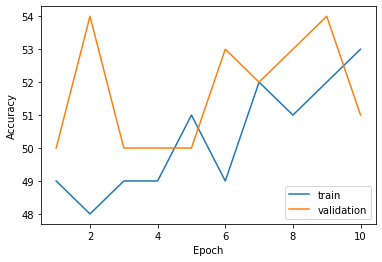

In [13]:
# YOUR CODE HERE
print(train_loss)
print(val_loss)
plt.plot(np.linspace(1,10,10), train_loss, label="train")
plt.plot(np.linspace(1,10,10), val_loss, label="validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(np.linspace(1,10,10), train_acc, label="train")
plt.plot(np.linspace(1,10,10), val_acc, label="validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**(2 POE)** Based on these, what would you suggest for improving your model? Why?

**Your answer:** We can see in the plots that we have a low variance but a high bias. As seen in the course we know that we can train more and have a deeper network so we will increase the number of epochs and add a few more layers to capture more features of the data.

---
## 3. Improving your model

**(1 POE)** Continue to improve your model architecture by comparing the value of the metrics you're interested in for both the training and validation set. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here. Save the training and validation losses and accuracies. You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to Canvas, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [14]:
# YOUR CODE HERE
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.fc1 = nn.Linear(128*26*26, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128*26*26)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x

model = Model()
model = model.to(device)
criterion = torch.nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

model = model.to(device)

# YOUR CODE HERE
train_loss = []
train_acc = []

val_loss = []
val_acc = []

running_loss = 0.0
for epoch in range(50):
    epoch_loss = []
    epoch_acc = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # backward + optimize
        loss.backward()
        optimizer.step()
        
        # save statistics
        epoch_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total = labels.size(0)
        correct = (truth.eq(predicted.long())).sum()
        epoch_acc.append(100 * correct / total)

        # print statistics
        running_loss += loss.item()
        # print every 2000 mini-batches
        
    print('[%d, %5d] loss: %.3f Acc:%.3f' %
          (epoch + 1, i + 1, running_loss / len(epoch_loss),np.array(epoch_acc).sum()/len(epoch_acc)))

    
    
    train_loss.append(running_loss/len(epoch_loss))
    train_acc.append(np.array(epoch_acc).sum()/len(epoch_acc))
    running_loss = 0
    total = 0
    correct = 0
    count = 0
    for i, data in enumerate(valloader, 0):
        inputs, labels = data 
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        count = count +1
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        running_loss = running_loss + loss.item()

        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total += labels.size(0)
        correct += (truth.eq(predicted.long())).sum()
        
        torch.cuda.empty_cache()
        
    val_acc.append(100 * correct / total)
    val_loss.append(running_loss / count)
    running_loss = 0
    
        
print('Finished Training')

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1,   110] loss: 0.694 Acc:49.000
[2,   110] loss: 0.693 Acc:49.000
[3,   110] loss: 0.693 Acc:51.000
[4,   110] loss: 0.692 Acc:52.000
[5,   110] loss: 0.692 Acc:54.000
[6,   110] loss: 0.691 Acc:54.000
[7,   110] loss: 0.690 Acc:54.000
[8,   110] loss: 0.688 Acc:55.000
[9,   110] loss: 0.686 Acc:56.000
[10,   110] loss: 0.683 Acc:57.000
[11,   110] loss: 0.681 Acc:56.000
[12,   110] loss: 0.677 Acc:57.000
[13,   110] loss: 0.675 Acc:57.000
[14,   110] loss: 0.677 Acc:56.000
[15,   110] loss: 0.668 Acc:59.000
[16,   110] loss: 0.668 Acc:59.000
[17,   110] loss: 0.671 Acc:58.000
[18,   110] loss: 0.662 Acc:60.000
[19,   110] loss: 0.654 Acc:61.000
[20,   110] loss: 0.653 Acc:62.000
[21,   110] loss: 0.645 Acc:62.000
[22,   110] loss: 0.649 Acc:62.000
[23,   110] loss: 0.635 Acc:63.000
[24,   110] loss: 0.632 Acc:64.000
[25,   110] loss: 0.629 Acc:64.000
[26,   110] loss: 0.613 Acc:65.000
[27,   110] loss: 0.622 Acc:64.000
[28,   110] loss: 0.602 Acc:67.000
[29,   110] loss: 0.588 Acc:6

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

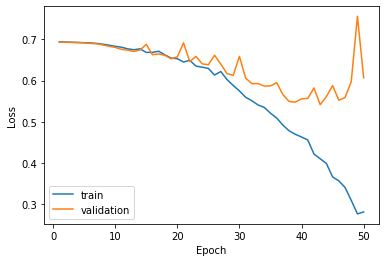

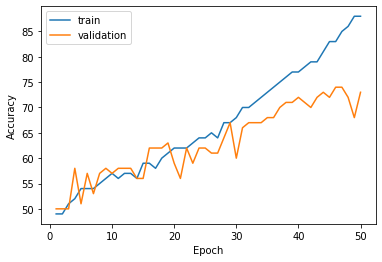

In [15]:
# YOUR CODE HERE
plt.plot(np.linspace(1,50,50), train_loss, label="train")
plt.plot(np.linspace(1,50,50), val_loss, label="validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(np.linspace(1,50,50), train_acc, label="train")
plt.plot(np.linspace(1,50,50), val_acc, label="validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**(2 POE)** Did your results improve? What problems did your improvements fix? Explain why, or why not. 

**Your answer:** Yes it did but we now see a higher variance which means that we got overfitting. to solve it we could use regularisation and similar

[Save your model](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to disk (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual file you create is not relevant to your submission. The code to save the model is given in the cell below. 

In [16]:
# Assuming that you called your model "my_model"
torch.save(model.state_dict(), "my_model")

---
## 4. Transfer Learning

**From now, training on CPU will not be feasible. If your computer has a GPU, try it out! Otherwise, now is the time to connect to your cloud instance**

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected layers + softmax). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the *pretrained* VGG16 model, from the [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html).

In [17]:
# YOUR CODE HERE
import torchvision.models as models
vgg_model = models.vgg16(pretrained=True)

Create a new model with the layers you want to add on top of VGG.

*Hint:*
- You can access and modify the top layers of the VGG model with `vgg_model.classifier`, and the remaining layers with `vgg_model.features`.
- You can get the number of output features of `vgg_model.features` with `vgg_model.classifier[0].in_features`

In [18]:
# YOUR CODE HERE
class Vgg(nn.Module):
    def __init__(self):
        super(Vgg, self).__init__()
        self.fc = nn.Linear(4096, 2)

    def forward(self, x):
        x = F.softmax(self.fc(x))
        return x

vgg = Vgg()

Now add the new model on top of VGG.

In [19]:
# YOUR CODE HERE
vgg_model.classifier[-1] = vgg
vgg_model = vgg_model.to(device)

### 4.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the attribute `requires_grad` for all parameters `vgg_model.features` to `False`.

In [20]:
# Freeze bottom
# YOUR CODE HERE

for param in vgg_model.features.parameters():
    param.requires_grad = False
    
criterion = nn.BCELoss()
optimizer = optim.SGD(vgg_model.parameters(), lr=0.001, momentum=0.9)

Perform the transfer learning by training the top layers of your model.

In [21]:
# YOUR CODE HERE
transfer_train_loss = []
transfer_train_acc = []

transfer_val_loss = []
transfer_val_acc = []

running_loss = 0.0
for epoch in range(10):
    epoch_loss = []
    epoch_acc = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = vgg_model(inputs)
        loss = criterion(outputs, labels)
        # backward + optimize
        loss.backward()
        optimizer.step()
        
        # save statistics
        epoch_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total = labels.size(0)
        correct = (truth.eq(predicted.long())).sum()
        epoch_acc.append(100 * correct / total)

        # print statistics
        running_loss += loss.item()
        # print every 2000 mini-batches
        
    print('[%d, %5d] loss: %.3f Acc:%.3f' %
          (epoch + 1, i + 1, running_loss / len(epoch_loss),np.array(epoch_acc).sum()/len(epoch_acc)))

    
    
    transfer_train_loss.append(running_loss/len(epoch_loss))
    transfer_train_acc.append(np.array(epoch_acc).sum()/len(epoch_acc))
    running_loss = 0
    total = 0
    correct = 0
    count = 0
    for i, data in enumerate(valloader, 0):
        inputs, labels = data 
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        count = count +1
        outputs = vgg_model(inputs)
        loss = criterion(outputs, labels)
        running_loss = running_loss + loss.item()
        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total += labels.size(0)
        correct += (truth.eq(predicted.long())).sum()
        
        torch.cuda.empty_cache()
        
    transfer_val_acc.append(100 * correct / total)
    transfer_val_loss.append(running_loss / count)
    running_loss = 0
    
        
print('Finished Training')

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


[1,   110] loss: 0.162 Acc:92.000
[2,   110] loss: 0.092 Acc:95.000
[3,   110] loss: 0.080 Acc:96.000
[4,   110] loss: 0.064 Acc:97.000
[5,   110] loss: 0.050 Acc:97.000
[6,   110] loss: 0.043 Acc:98.000
[7,   110] loss: 0.034 Acc:98.000
[8,   110] loss: 0.034 Acc:98.000
[9,   110] loss: 0.027 Acc:98.000
[10,   110] loss: 0.023 Acc:99.000
Finished Training


Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

[0.10326251804958334, 0.10305303926094057, 0.10256141831541099, 0.09692469799326954, 0.10134008653770271, 0.1287646025361496, 0.093709972990545, 0.12859849454438843, 0.13114055921795292, 0.125673661647102]


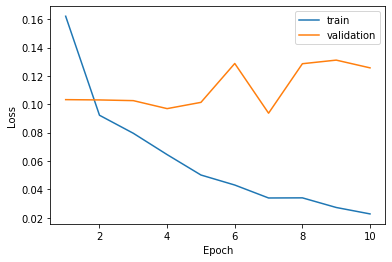

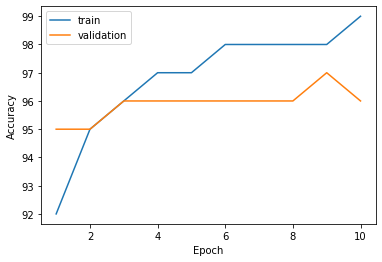

In [22]:
# YOUR CODE HERE
print(transfer_val_loss)
plt.plot(np.linspace(1,10,10), transfer_train_loss, label="train")
plt.plot(np.linspace(1,10,10), transfer_val_loss, label="validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(np.linspace(1,10,10), transfer_train_acc, label="train")
plt.plot(np.linspace(1,10,10), transfer_val_acc, label="validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

How does the model perform, compared to the model obtained in step 3? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

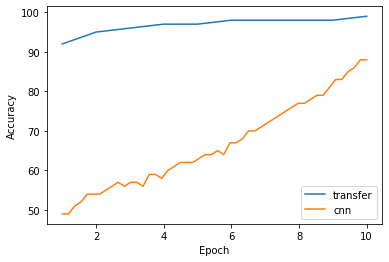

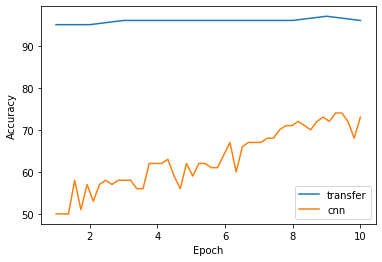

In [23]:
# YOUR CODE HERE
plt.plot(np.linspace(1,10,10), transfer_train_acc, label="transfer")
plt.plot(np.linspace(1,10,50), train_acc, label="cnn")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
plt.plot(np.linspace(1,10,10), transfer_val_acc, label="transfer")
plt.plot(np.linspace(1,10,50), val_acc, label="cnn")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**(2 POE)** Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Reflect on whether your comparison is fair or not:

**Your answer:** (fill in here)
The transfer learning is superiour, but it's not surprising at all, since it's a much deeper and more complex network trained on a huge dataset which allowed it to capture a lot of general traits it applied to the cats vs dogs classification. It's not really a fair comparassion, because of the differences in training sizes and complexity of the networks.

**(1 POE)** What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** (fill in here)
The ImageNet has 1000 classes whereas our dataset just has 2.

**Optional (2 POE)** Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** (fill in here)
Since the larger amout of classes and images allows the network to generalise over "generic" images and apply these to the cats and dogs images. Also, there's cats and dogs in the ImageNet dataset

**Optional (1 POE)** In which scenario would transfer learning be unsuitable?

**Your answer:** (fill in here)
If the datasets have no resemblance, where there's no features to generalise.

Save the model to a file.

In [24]:
torch.save(vgg_model.state_dict(), "trans_learning_top_only")

### 4.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers by resetting the `requires_grad` attribute to `True`.

In [25]:
# UnFreeze bottom
# YOUR CODE HERE
for param in vgg_model.features.parameters():
    param.requires_grad = True

Fine tune the model by training all the layers.

Hint:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

In [26]:
# YOUR CODE HERE
# YOUR CODE HERE
transfer_fine_train_loss = []
transfer_fine_train_acc = []

transfer_fine_val_loss = []
transfer_fine_val_acc = []

running_loss = 0.0
for epoch in range(10):
    epoch_loss = []
    epoch_acc = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = vgg_model(inputs)
        loss = criterion(outputs, labels)
        # backward + optimize
        loss.backward()
        optimizer.step()
        
        # save statistics
        epoch_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total = labels.size(0)
        correct = (truth.eq(predicted.long())).sum()
        epoch_acc.append(100 * correct / total)

        # print statistics
        running_loss += loss.item()
        # print every 2000 mini-batches
        
    print('[%d, %5d] loss: %.3f Acc:%.3f' %
          (epoch + 1, i + 1, running_loss / len(epoch_loss),np.array(epoch_acc).sum()/len(epoch_acc)))

    
    
    transfer_fine_train_loss.append(running_loss/len(epoch_loss))
    transfer_fine_train_acc.append(np.array(epoch_acc).sum()/len(epoch_acc))
    running_loss = 0
    total = 0
    correct = 0
    count = 0
    for i, data in enumerate(valloader, 0):
        inputs, labels = data 
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        count = count +1
        outputs = vgg_model(inputs)
        loss = criterion(outputs, labels)

        running_loss = running_loss + loss.item()

        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total += labels.size(0)
        correct += (truth.eq(predicted.long())).sum()
        
        torch.cuda.empty_cache()
        
    transfer_fine_val_acc.append(100 * correct / total)
    transfer_fine_val_loss.append(running_loss / count)
    running_loss = 0
    
        
print('Finished Training')

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


[1,   110] loss: 0.049 Acc:97.000
[2,   110] loss: 0.015 Acc:99.000
[3,   110] loss: 0.020 Acc:99.000
[4,   110] loss: 0.009 Acc:99.000
[5,   110] loss: 0.003 Acc:99.000
[6,   110] loss: 0.002 Acc:100.000
[7,   110] loss: 0.001 Acc:100.000
[8,   110] loss: 0.002 Acc:99.000
[9,   110] loss: 0.002 Acc:99.000
[10,   110] loss: 0.006 Acc:99.000
Finished Training


How does the model perform, compared to the model trained with frozen layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

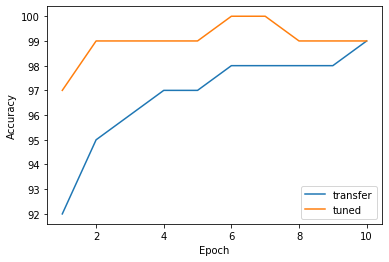

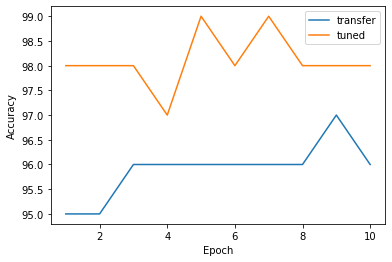

In [27]:
# YOUR CODE HERE
# YOUR CODE HERE
plt.plot(np.linspace(1,10,10), transfer_train_acc, label="transfer")
plt.plot(np.linspace(1,10,10), transfer_fine_train_acc, label="tuned")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
plt.plot(np.linspace(1,10,10), transfer_val_acc, label="transfer")
plt.plot(np.linspace(1,10,10), transfer_fine_val_acc, label="tuned")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**(1 POE)** Did the model's performance improve? Why (why not)?

**Your answer:** (fill in here)
Yes it did, since unfreeze allows for more specificity for the cats vs dogs case. We have more parameters that can be tuned to our case, which should increase performance unless we start to overfit, which we didn't do here.

Save the model to file.

In [28]:
torch.save(vgg_model.state_dict(), "trans_learning_full")

### 4.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here.

In [33]:
# YOUR CODE HERE
vgg_model_imp = models.vgg16(pretrained=True)

class VggImp(nn.Module):
    def __init__(self):
        super(VggImp, self).__init__()
        self.fc1 = nn.Linear(4096, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        return x

vgg_imp = VggImp()
vgg_model_imp.classifier[-1] = vgg_imp
vgg_model_imp = vgg_model_imp.to(device)

criterion = nn.BCELoss()
optimizer = optim.SGD(vgg_model_imp.parameters(), lr=0.001, momentum=0.9)

for param in vgg_model_imp.features.parameters():
    param.requires_grad = False

In [34]:
# YOUR CODE HERE
transfer_imp_train_loss = []
transfer_imp_train_acc = []

transfer_imp_val_loss = []
transfer_imp_val_acc = []

running_loss = 0.0
for epoch in range(1):
    epoch_loss = []
    epoch_acc = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = vgg_model_imp(inputs)
        loss = criterion(outputs, labels)
        # backward + optimize
        loss.backward()
        optimizer.step()
        
        # save statistics
        epoch_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total = labels.size(0)
        correct = (truth.eq(predicted.long())).sum()
        epoch_acc.append(100 * correct / total)

        # print statistics
        running_loss += loss.item()
        # print every 2000 mini-batches
        
    print('[%d, %5d] loss: %.3f Acc:%.3f' %
          (epoch + 1, i + 1, running_loss / len(epoch_loss),np.array(epoch_acc).sum()/len(epoch_acc)))

    
    
    transfer_imp_train_loss.append(running_loss/len(epoch_loss))
    transfer_imp_train_acc.append(np.array(epoch_acc).sum()/len(epoch_acc))
    running_loss = 0
    total = 0
    correct = 0
    count = 0
    for i, data in enumerate(valloader, 0):
        inputs, labels = data 
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        count = count +1
        outputs = vgg_model_imp(inputs)
        loss = criterion(outputs, labels)

        running_loss = running_loss + loss.item()

        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total += labels.size(0)
        correct += (truth.eq(predicted.long())).sum()
        
        torch.cuda.empty_cache()
        
    transfer_imp_val_acc.append(100 * correct / total)
    transfer_imp_val_loss.append(running_loss / count)
    running_loss = 0
    
        
print('Finished Training')

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


[1,   110] loss: 0.249 Acc:89.000
Finished Training


In [35]:
for param in vgg_model_imp.features.parameters():
    param.requires_grad = True

In [36]:
transfer_imp_train_loss = []
transfer_imp_train_acc = []

transfer_imp_val_loss = []
transfer_imp_val_acc = []

running_loss = 0.0
for epoch in range(5):
    epoch_loss = []
    epoch_acc = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = vgg_model_imp(inputs)
        loss = criterion(outputs, labels)
        # backward + optimize
        loss.backward()
        optimizer.step()
        
        # save statistics
        epoch_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total = labels.size(0)
        correct = (truth.eq(predicted.long())).sum()
        epoch_acc.append(100 * correct / total)

        # print statistics
        running_loss += loss.item()
        # print every 2000 mini-batches
        
    print('[%d, %5d] loss: %.3f Acc:%.3f' %
          (epoch + 1, i + 1, running_loss / len(epoch_loss),np.array(epoch_acc).sum()/len(epoch_acc)))

    
    
    transfer_imp_train_loss.append(running_loss/len(epoch_loss))
    transfer_imp_train_acc.append(np.array(epoch_acc).sum()/len(epoch_acc))
    running_loss = 0
    total = 0
    correct = 0
    count = 0
    for i, data in enumerate(valloader, 0):
        inputs, labels = data 
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        count = count +1
        outputs = vgg_model_imp(inputs)
        loss = criterion(outputs, labels)

        running_loss = running_loss + loss.item()

        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total += labels.size(0)
        correct += (truth.eq(predicted.long())).sum()
        
        torch.cuda.empty_cache()
        
    transfer_imp_val_acc.append(100 * correct / total)
    transfer_imp_val_loss.append(running_loss / count)
    running_loss = 0
    
        
print('Finished Training')

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


[1,   110] loss: 0.065 Acc:97.000
[2,   110] loss: 0.035 Acc:98.000
[3,   110] loss: 0.025 Acc:98.000
[4,   110] loss: 0.011 Acc:99.000
[5,   110] loss: 0.007 Acc:99.000
Finished Training


**(1 POE)** How does the model perform, compared to the model trained in step 4.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

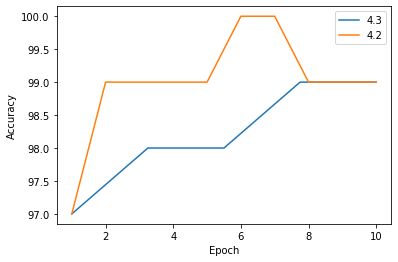

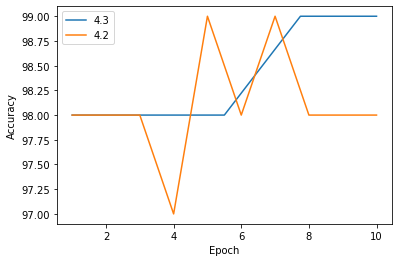

In [38]:
# YOUR CODE HERE
# YOUR CODE HERE
plt.plot(np.linspace(1,10,5), transfer_imp_train_acc, label="4.3")
plt.plot(np.linspace(1,10,10), transfer_fine_train_acc, label="4.2")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
plt.plot(np.linspace(1,10,5), transfer_imp_val_acc, label="4.3")
plt.plot(np.linspace(1,10,10), transfer_fine_val_acc, label="4.2")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

Save the model to a file.

In [41]:
torch.save(vgg_model_imp.state_dict(), "best_trans_learning")

RuntimeError: write(): fd 6 failed with No space left on device

## 5. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data loaders, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [42]:
# YOUR CODE HERE
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_if = ImageFolder(Path.cwd() / "train", transform=data_transform)
trainloader = DataLoader(train_if, batch_size = 32, shuffle=True, num_workers=8)
val_if = ImageFolder(Path.cwd() / "val", transform=data_transform)
valloader = DataLoader(val_if, batch_size =1, shuffle=True, num_workers=8)

Train your model using the full data. This optimization might take a long time, so live plotting of some metrics is recommended.

In [43]:
# YOUR CODE HERE
# YOUR CODE HERE
vgg_model_imp = models.vgg16(pretrained=True)

class VggImp(nn.Module):
    def __init__(self):
        super(VggImp, self).__init__()
        self.fc1 = nn.Linear(4096, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        return x

vgg_imp = VggImp()
vgg_model_imp.classifier[-1] = vgg_imp
vgg_model_imp = vgg_model_imp.to(device)

criterion = nn.BCELoss()
optimizer = optim.SGD(vgg_model_imp.parameters(), lr=0.001, momentum=0.9)

for param in vgg_model_imp.features.parameters():
    param.requires_grad = False





transfer_final_train_loss = []
transfer_final_train_acc = []

transfer_final_val_loss = []
transfer_final_val_acc = []

running_loss = 0.0
for epoch in range(1):
    epoch_loss = []
    epoch_acc = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = vgg_model_imp(inputs)
        loss = criterion(outputs, labels)
        # backward + optimize
        loss.backward()
        optimizer.step()
        
        # save statistics
        epoch_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total = labels.size(0)
        correct = (truth.eq(predicted.long())).sum()
        epoch_acc.append(100 * correct / total)

        # print statistics
        running_loss += loss.item()
        # print every 2000 mini-batches
        
    print('[%d, %5d] loss: %.3f Acc:%.3f' %
          (epoch + 1, i + 1, running_loss / len(epoch_loss),np.array(epoch_acc).sum()/len(epoch_acc)))

    
    
    transfer_final_train_loss.append(running_loss/len(epoch_loss))
    transfer_final_train_acc.append(np.array(epoch_acc).sum()/len(epoch_acc))
    running_loss = 0
    total = 0
    correct = 0
    count = 0
    for i, data in enumerate(valloader, 0):
        inputs, labels = data 
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        count = count +1
        outputs = vgg_model_imp(inputs)
        loss = criterion(outputs, labels)

        running_loss = running_loss + loss.item()

        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total += labels.size(0)
        correct += (truth.eq(predicted.long())).sum()
        
        torch.cuda.empty_cache()
        
    transfer_final_val_acc.append(100 * correct / total)
    transfer_final_val_loss.append(running_loss / count)
    running_loss = 0
    
        


for param in vgg_model_imp.features.parameters():
    param.requires_grad = True
    

running_loss = 0.0
for epoch in range(5):
    epoch_loss = []
    epoch_acc = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = vgg_model_imp(inputs)
        loss = criterion(outputs, labels)
        # backward + optimize
        loss.backward()
        optimizer.step()
        
        # save statistics
        epoch_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total = labels.size(0)
        correct = (truth.eq(predicted.long())).sum()
        epoch_acc.append(100 * correct / total)

        # print statistics
        running_loss += loss.item()
        # print every 2000 mini-batches
        
    print('[%d, %5d] loss: %.3f Acc:%.3f' %
          (epoch + 1, i + 1, running_loss / len(epoch_loss),np.array(epoch_acc).sum()/len(epoch_acc)))

    
    
    transfer_final_train_loss.append(running_loss/len(epoch_loss))
    transfer_final_train_acc.append(np.array(epoch_acc).sum()/len(epoch_acc))
    running_loss = 0
    total = 0
    correct = 0
    count = 0
    for i, data in enumerate(valloader, 0):
        inputs, labels = data 
        y = torch.zeros(len(labels), 2, dtype=torch.float)
        y[range(y.shape[0]), labels]=1
        labels = y
        inputs = inputs.to(device)
        labels = labels.to(device)
        count = count +1
        outputs = vgg_model_imp(inputs)
        loss = criterion(outputs, labels)

        running_loss = running_loss + loss.item()

        _, predicted = torch.max(outputs, 1)
        _, truth = torch.max(labels, 1)
        total += labels.size(0)
        correct += (truth.eq(predicted.long())).sum()
        
        torch.cuda.empty_cache()
        
    transfer_final_val_acc.append(100 * correct / total)
    transfer_final_val_loss.append(running_loss / count)
    running_loss = 0
    
        
print('Finished Training')

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


[1,   704] loss: 0.118 Acc:94.000
[1,   704] loss: 0.042 Acc:98.000
[2,   704] loss: 0.022 Acc:99.000
[3,   704] loss: 0.017 Acc:99.000
[4,   704] loss: 0.011 Acc:99.000
[5,   704] loss: 0.009 Acc:99.000
Finished Training


How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

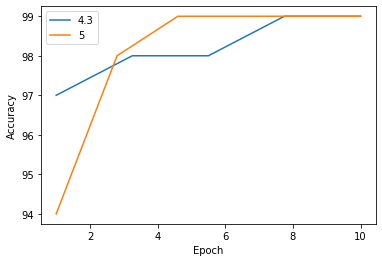

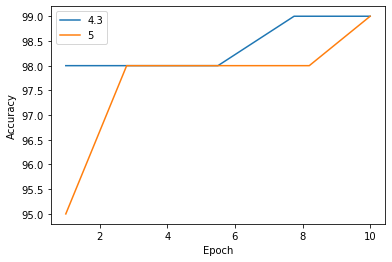

In [49]:
# YOUR CODE HERE
plt.plot(np.linspace(1,10,5), transfer_imp_train_acc, label="4.3")
plt.plot(np.linspace(1,10,6), transfer_final_train_acc, label="5")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
plt.plot(np.linspace(1,10,5), transfer_imp_val_acc, label="4.3")
plt.plot(np.linspace(1,10,6), transfer_final_val_acc, label="5")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**(2 POE)** What can you conclude from these plots? Did you expect what you observe in the plots, explain!

**Your answer:** (fill in here)
The smaller datasets have produced good performance, mainly because of the transfer learning, training on the complete dataset allows for more training, but looking at the performance that isn't really possible or even a good solution. The larger dataset would be more usefull if we didn't use transfer learning.

## 6. Evaluation on test set (optional)

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. 

As a bit of fun and to inspire some friendly competition you may instead submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Hints:
- There is a `sampleSubmission.csv` file included in the zip data. Take a look at it to better understand what is the expected format here.
- `pathlib`'s `Path` class has a `glob` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.

In [ ]:
# YOUR CODE HERE

Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, but you can submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) via the "Late submission" button (they use the same data). The Kaggle CLI can be used as well. Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** (fill in here)

What was the username you used for this submission?

**Your answer:** (fill in here)